# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

C:\Users\Kushaagra Mehta\AppData\Local\Temp\ipykernel_25016\1975430074.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


In [3]:
# import nltk
# nltk.download('stopwords')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


# Dataset

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
# dataset stats
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [10]:
len(data)

159571

## Exploratory Data Analysis

In [11]:
# count of each label
x = data.iloc[:,2:].sum()
x

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [12]:
# sum of labaels on each row
rowsums = data.iloc[:,2:].sum(axis=1)
rowsums

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

In [13]:
print("Total Comments: ", len(data))
print("Total labels present: ", x.sum())
print("Comments without any labels: ", (rowsums==0).sum())


Total Comments:  159571
Total labels present:  35098
Comments without any labels:  143346


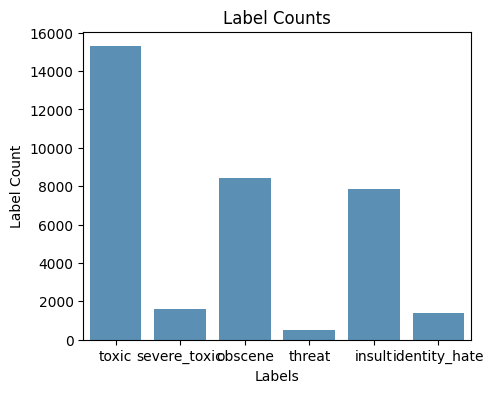

In [14]:
plt.figure(figsize=(5,4))
ax = sns.barplot(x=x.index, y =x.values, alpha= 0.8)
plt.title('Label Counts')
plt.xlabel("Labels")
plt.ylabel("Label Count")
plt.show()

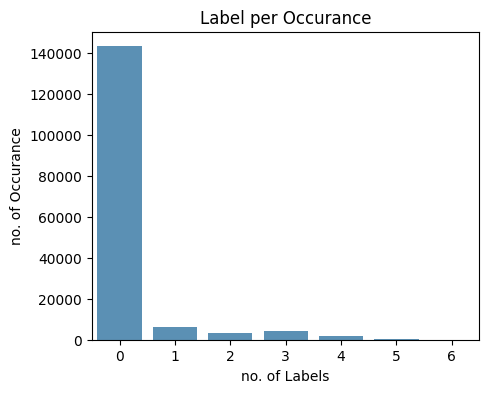

In [15]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x=rowsums.values, alpha= 0.8)
plt.title("Label per Occurance")
plt.xlabel("no. of Labels")
plt.ylabel("no. of Occurance")
plt.show()

## Preprocessing

In [16]:
data.drop(columns=['id'], axis=1, inplace=True)
data

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


### Removing Stopwords

In [17]:
stopwords = set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [18]:
# test_text = "\nMore\nI can't make any real suggestions on ."

def remove_stopwords(text):
    text_without_stopwords = [i for i in text.split() if i not in stopwords]
    return " ".join(text_without_stopwords)

# a = remove_stopwords(test_text)
# print(a)

In [19]:
def text_cleaning(text):
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", "not", text)
    text = re.sub(r"i'm", "i am ",text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'11", " will", text)
    text = re.sub(r"\'scuse", " excuse", text)
    text = re.sub('\W', ' ',text)
    text = re.sub('\s+',' ', text)
    text = text.strip('')

    return text
    

# b = text_cleaning(a)
# print(b)

### Stemming

In [20]:
stemmer = SnowballStemmer('english')

def stemming(sentence):
    stemmed_sentence = ""
    for word in sentence.split():
        stemmed_word = stemmer.stem(word)
        stemmed_sentence += stemmed_word + " "
        
    stemmed_sentence.strip()
    return stemmed_sentence


# print(stemming(b))

In [21]:
data['comment_text'] = data['comment_text'].apply(lambda x:  remove_stopwords(x))
data['comment_text'] = data['comment_text'].apply(lambda x:  text_cleaning(x))
data['comment_text'] = data['comment_text'].apply(lambda x:  stemming(x))

In [22]:
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explan whi edit made usernam hardcor metallica...,0,0,0,0,0,0
1,d aww he match background colour i m seem stuc...,0,0,0,0,0,0
2,hey man i m realli tri edit war it guy constan...,0,0,0,0,0,0
3,more i can not make real suggest improv i wond...,0,0,0,0,0,0
4,you sir hero ani chanc rememb page that on,0,0,0,0,0,0


### Splitting Input and Output

In [23]:
x = data.iloc[:,:1]
y = data.iloc[:,1:]

In [52]:
x_train , x_test , y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=42)

In [198]:
x_train = x_train.values
x_test = x_test.values


In [199]:
x_train = x_train.reshape(-1)
x_test = x_test.reshape(-1)



In [200]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((127656,), (127656, 6), (31915,), (31915, 6))

In [35]:
def run_pipeline(pipeline, x_train, x_test, y_train, y_test):
#     training
    pipeline.fit(x_train, y_train)
#     predicting
    predictions = pipeline.predict(x_test)
    pred_proba = pipeline.predict_proba(x_test)
    
#     Metrics
    print("ROC-AUC: ", roc_auc_score(y_test, pred_proba))
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print("Classification Report: ")
    print(classification_report(y_test, predictions,target_names=y_train.columns))

In [34]:
# naive bias pipeline
NB_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb_model', OneVsRestClassifier(MultinomialNB(), n_jobs=-1))
])

# logistic regression pipeline

LR_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb_model', OneVsRestClassifier(LogisticRegression(), n_jobs=-1))
])

In [27]:
# run_pipeline(NB_pipeline, x_train, x_test, y_train, y_test)

In [57]:
run_pipeline(NB_pipeline, x_train, x_test, y_train, y_test)

ROC-AUC:  0.8605494085700883
Accuracy:  0.8998276672411092
Classification Report: 
               precision    recall  f1-score   support

        toxic       0.99      0.19      0.32      3056
 severe_toxic       0.00      0.00      0.00       321
      obscene       0.98      0.11      0.20      1715
       threat       1.00      0.01      0.03        74
       insult       0.97      0.05      0.10      1614
identity_hate       0.00      0.00      0.00       294

    micro avg       0.98      0.12      0.22      7074
    macro avg       0.66      0.06      0.11      7074
 weighted avg       0.90      0.12      0.21      7074
  samples avg       0.02      0.01      0.01      7074



In [232]:
run_pipeline(LR_pipeline, x_train, x_test, y_train, y_test)

ROC-AUC:  0.9789765338334316
Accuracy:  0.9181889393702021
Classification Report: 
               precision    recall  f1-score   support

        toxic       0.91      0.62      0.74      3056
 severe_toxic       0.58      0.27      0.37       321
      obscene       0.91      0.64      0.75      1715
       threat       0.62      0.14      0.22        74
       insult       0.81      0.51      0.63      1614
identity_hate       0.70      0.16      0.26       294

    micro avg       0.87      0.56      0.68      7074
    macro avg       0.75      0.39      0.50      7074
 weighted avg       0.86      0.56      0.67      7074
  samples avg       0.06      0.05      0.05      7074



### Exporting the Model

In [225]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [226]:
import joblib

In [233]:
joblib.dump(LR_pipeline, 'LogisticRegModel.pkl')

['LogisticRegModel.pkl']

In [234]:
import pickle
with open('LogisticRegModel2.pkl', 'wb') as file:
    pickle.dump(LR_pipeline, file)

In [231]:
import sklearn
print(sklearn.__version__)

1.4.2


### Testing Prediction
    

In [59]:
labels = y_train.columns

In [189]:
data.sample(1).values[0]


array(['web trust it fault gay littl faggot vandal kept edit articl remov link offici websit damn thing ad like 30 spam link noth wot 4 244 36 149 ',
       1, 0, 1, 0, 1, 1], dtype=object)

In [190]:
sent = "web trust it fault gay littl faggot vandal kept edit articl remov link offici websit damn thing ad like 30 spam link noth wot 4 244 36 149 "

In [191]:
stemed_ip = stemming(sent)
stemed_ip

'web trust it fault gay littl faggot vandal kept edit articl remov link offici websit damn thing ad like 30 spam link noth wot 4 244 36 149 '

In [192]:
res = LR_pipeline.predict([stemed_ip])[0]
for label, result in zip(labels, res):
    
    
    
    print("%14s %5s" % (label, result))

         toxic     1
  severe_toxic     0
       obscene     0
        threat     0
        insult     0
 identity_hate     0


## Roc Curve

In [221]:
def roc_plot(test_features, predict_prob):
    fpr, tpr, threshold = roc_curve(test_features, predict_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.title("Roc Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True)
    plt.legend
    
def plot_pipleline_roc(pipeline, x_train, x_test, y_train, y_test):
    for label in labels:
        pipeline.fit(x_train, y_train[label])
        predict_probs= pipeline.predict_proba(x_test)[:,1]
        roc_plot(y_test[label], predict_probs)

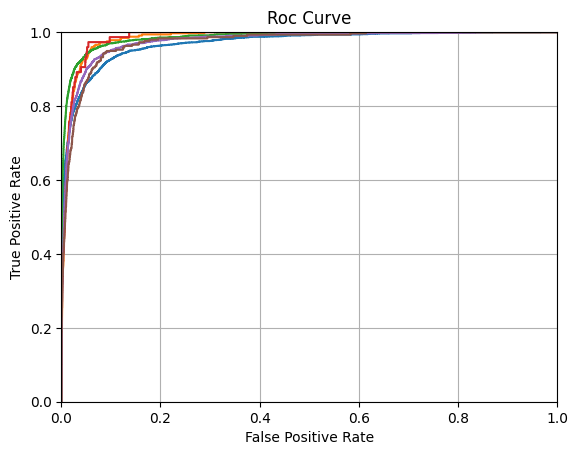

In [222]:
plot_pipleline_roc(LR_pipeline, x_train, x_test, y_train, y_test)
